In [84]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

### Optimizing Delivery Routes Problem

#### 3.1. Dataset Creation 

In [86]:
X, y = make_classification(
    n_samples=40,  
    n_features=4,  
    n_informative=3, 
    n_redundant=0
)

In [87]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=['Delivery Distance', 'Delivery Time', 'Traffic Intensity', 'Operational Delay'])
# Setting 0 - for not delayed
# Setting 1 - For Delayed
df['Delayed'] = y

Creating Categorical Features:

In [89]:
df['Vehicle Type'] = np.random.choice(['Bike', 'Van', 'Truck'], size=len(df))
df['Weather Conditions'] = np.random.choice(['Sunny', 'Rainy', 'Snowy'], size=len(df))

Creating Numerical Features:

In [91]:
df['Delivery Distance'] = (df['Delivery Distance'] * 10 + 50).round(2)  # Scaling this feature from 50-150 km
df['Delivery Time'] = (df['Delivery Time'] * 2 + 8).round(2)  # Scale Delivery time to 6-12 hours
df['Traffic Intensity'] = (df['Traffic Intensity'] * 10 + 50).round()  # Scale the intensity of traffic between 1-100
df['Operational Delay'] = (df['Operational Delay'] * 2 + 1).round(2)  # Scale Delay time to 0-5 hours

Introducing Data Challenges:

In [93]:
missing_values = np.random.choice(df.index, size=5, replace=False)
df.loc[missing_values, 'Weather Conditions'] = np.nan

In [94]:
outlier_indices = np.random.choice(df.index, size=2, replace=False)
df.loc[outlier_indices, 'Delivery Distance'] = [300, -50]  

In [95]:
df['Vehicle Type'] = df['Vehicle Type'].replace({
    'Truck': np.random.choice(['truck', 'TRK', 'Truck'], size=len(df))
})

Shuffling the data:

In [97]:
df = df.sample(frac=1).reset_index(drop=True)

In [98]:
df.head()

,Delivery Distance,Delivery Time,Traffic Intensity,Operational Delay,Delayed,Vehicle Type,Weather Conditions
0,38.65,6.84,53.0,-0.78,1,Van,Rainy
1,60.59,8.70,66.0,3.59,1,Bike,Rainy
2,40.83,7.58,63.0,-0.85,1,Truck,NaN
3,42.93,5.62,45.0,0.13,0,Van,Sunny
4,44.85,7.80,48.0,0.89,0,Bike,Snowy


Saving the dataset in the form of a '.csv' file:

In [100]:
df.to_csv("ques3-data.csv", index=False)

In [101]:
df = pd.read_csv('ques3-data.csv')
df

,Delivery Distance,Delivery Time,Traffic Intensity,Operational Delay,Delayed,Vehicle Type,Weather Conditions
0,38.65,6.84,53.0,-0.78,1,Van,Rainy
1,60.59,8.70,66.0,3.59,1,Bike,Rainy
2,40.83,7.58,63.0,-0.85,1,Truck,NaN
3,42.93,5.62,45.0,0.13,0,Van,Sunny
4,44.85,7.80,48.0,0.89,0,Bike,Snowy
5,64.41,7.48,41.0,3.81,0,Van,Sunny
6,37.32,9.27,60.0,-1.62,1,Van,Snowy
7,64.65,6.78,39.0,2.84,0,Bike,Rainy
8,65.13,10.03,60.0,5.01,1,TRK,Sunny
9,59.59,7.09,61.0,1.15,1,Bike,Sunny


Replacing the Negative values in the 'Operational Delay' column with '0'

In [ ]:
df['Operational Delay'] = df['Operational Delay'].apply(lambda x: max(x, 0))

To check the number of rows and columns present in the dataset:

In [121]:
df.shape

(40, 7)

#### 3.2. Data Cleaning

To check whether there are missing values or not:

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Delivery Distance   40 non-null     float64
 1   Delivery Time       40 non-null     float64
 2   Traffic Intensity   40 non-null     float64
 3   Operational Delay   40 non-null     float64
 4   Delayed             40 non-null     int64  
 5   Vehicle Type        40 non-null     object 
 6   Weather Conditions  35 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ KB


There is null values in Weather Conditions column:

In [132]:
df['Weather Conditions'] = df['Weather Conditions'].fillna(df['Weather Conditions'].mode()[0])

Now imputed all the missing values with Mode of that feature

Removing the Outliers:
Here we are using the Inter Quartile Range based outlier detection technique
Where we have to find the 'first quartile, third quartile' and find the lower bound and upper bounds so that we can easily detect and remove the outliers from the data.

In [153]:
df.describe()

,Delivery Distance,Delivery Time,Traffic Intensity,Operational Delay,Delayed
count,40.000000,40.000000,40.000000,40.000000,40.00000
mean,51.658750,8.067500,52.125000,2.193500,0.50000
std,13.488602,2.007975,12.734342,2.617513,0.50637
min,15.475000,4.090000,26.000000,-3.010000,0.00000
25%,42.662500,6.752500,41.750000,-0.162500,0.00000
50%,49.170000,7.725000,51.500000,2.415000,0.50000
75%,60.787500,9.370000,61.250000,4.070000,1.00000
max,87.975000,13.020000,80.000000,6.730000,1.00000


In [135]:
Q1 = df['Delivery Distance'].quantile(0.25)
Q3 = df['Delivery Distance'].quantile(0.75)
IQR = Q3 - Q1

In [137]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [139]:
df['Delivery Distance'] = df['Delivery Distance'].apply(lambda x: max(min(x, upper_bound), lower_bound))

Resolving the inconsistencies in categorical feature 'Vehicle Type'
we will use the mapping technique and capitalize technique to make sure we have the correct categorical features in the column.

In [141]:
df['Vehicle Type'] = df['Vehicle Type'].str.capitalize()

In [143]:
df

,Delivery Distance,Delivery Time,Traffic Intensity,Operational Delay,Delayed,Vehicle Type,Weather Conditions
0,38.650,6.84,53.0,-0.78,1,Van,Rainy
1,60.590,8.70,66.0,3.59,1,Bike,Rainy
2,40.830,7.58,63.0,-0.85,1,Truck,Snowy
3,42.930,5.62,45.0,0.13,0,Van,Sunny
4,44.850,7.80,48.0,0.89,0,Bike,Snowy
5,64.410,7.48,41.0,3.81,0,Van,Sunny
6,37.320,9.27,60.0,-1.62,1,Van,Snowy
7,64.650,6.78,39.0,2.84,0,Bike,Rainy
8,65.130,10.03,60.0,5.01,1,Trk,Sunny
9,59.590,7.09,61.0,1.15,1,Bike,Sunny


In [148]:
vehicle_correction = {
    'Truck': 'Truck',
    'truck': 'Truck',
    'TRK': 'Truck',
    'Trk': 'Truck',
    'Bike': 'Bike',
    'Van': 'Van'
}
df['Vehicle Type'] = df['Vehicle Type'].replace(vehicle_correction)

In [150]:
df

,Delivery Distance,Delivery Time,Traffic Intensity,Operational Delay,Delayed,Vehicle Type,Weather Conditions
0,38.650,6.84,53.0,-0.78,1,Van,Rainy
1,60.590,8.70,66.0,3.59,1,Bike,Rainy
2,40.830,7.58,63.0,-0.85,1,Truck,Snowy
3,42.930,5.62,45.0,0.13,0,Van,Sunny
4,44.850,7.80,48.0,0.89,0,Bike,Snowy
5,64.410,7.48,41.0,3.81,0,Van,Sunny
6,37.320,9.27,60.0,-1.62,1,Van,Snowy
7,64.650,6.78,39.0,2.84,0,Bike,Rainy
8,65.130,10.03,60.0,5.01,1,Truck,Sunny
9,59.590,7.09,61.0,1.15,1,Bike,Sunny


For converting the categorical to numerical feature we are performing the One-Hot Encoding approach to fit into the feature for model training

In [163]:
df_new= pd.get_dummies(df, columns=['Vehicle Type', 'Weather Conditions'], drop_first=True)

Defining the X (independent features) and y (target feature)

In [166]:
X = df_new.drop('Delayed', axis=1)
y = df_new['Delayed']

Splitting the data into training and testing

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 3.3 Analysis and Optimization

Model implementation by using Randomforest Classifier ensemble learning approach

Random Forest:

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
rf_model = RandomForestClassifier(n_estimators=100)

In [230]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [231]:
y_pred_rf_model = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



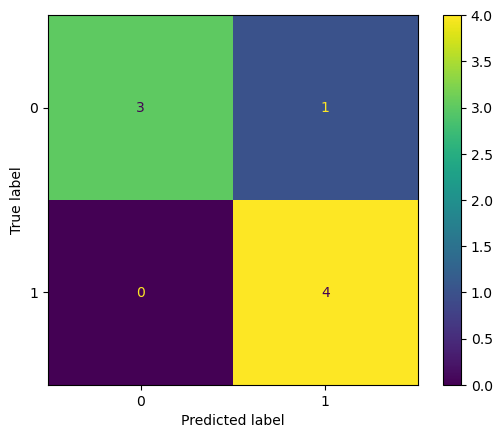

In [234]:
print(classification_report(y_test,y_pred_rf_model))
cm = confusion_matrix(y_test,y_pred_rf_model)
a = ConfusionMatrixDisplay(cm)
a.plot()

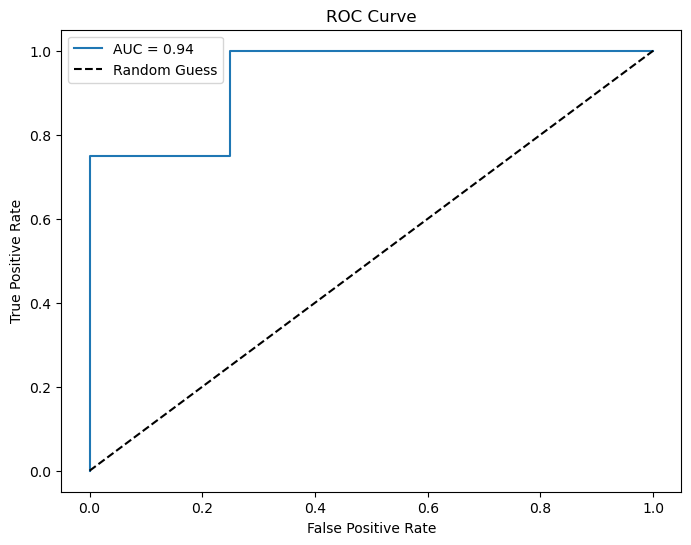

In [244]:
import matplotlib.pyplot as plt

y_score = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Feature Important Analysis:

In [247]:
from sklearn.inspection import permutation_importance

feature_importance = permutation_importance(rf_model, X_test, y_test, n_repeats = 10)

feature_imp = pd.DataFrame({
    'Features':X.columns,
    'Importance':feature_importance.importances_mean
}).sort_values(by='Importance',ascending=False)

In [249]:
feature_imp

,Features,Importance
3,Operational Delay,0.1750
2,Traffic Intensity,0.1375
0,Delivery Distance,0.0250
6,Weather Conditions_Snowy,0.0250
1,Delivery Time,0.0000
4,Vehicle Type_Truck,0.0000
5,Vehicle Type_Van,0.0000
7,Weather Conditions_Sunny,0.0000


Strategies for Route Optimization:

- The features which actually contribute the most in deciding whether the delay will happen or not are
  - Operational Delay
  - Traffic Intensity
  - Delivery Distance
- The optimized route will be taking a shorter distance, avoid travelling through intensed traffic routes and reduced operational delays.
- Predicting the weather condition before travelling ie. avoid travelling during snowy and rainy weather conditions.
- A real time traffic analysing system will suggest to change the delivery routes for the trucks dynamically when there's congestion in that particular route.